In [4]:
# Summary

# In this project I'll store a real world data set from the internet in a database and gain insights into data using SQL queries.
# I will also visualize a portion of the data in the database to see what story it tells.

In [5]:
# About the Dataset:

# The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
# This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.
# Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.
# A detailed description of the dataset can be found on the city of Chicago's website, but to summarize, the dataset has the following variables:
# - Community Area Number (ca): Used to uniquely identify each row of the dataset
# - Community Area Name (community_area_name): The name of the region in the city of Chicago
# - Percent of Housing Crowded (percent_of_housing_crowded): Percent of occupied housing units with more than one person per room
# - Percent Households Below Poverty (percent_households_below_poverty): Percent of households living below the federal poverty line
# - Percent Aged 16+ Unemployed (percent_aged_16_unemployed): Percent of persons over the age of 16 years that are unemployed
# - Percent Aged 25+ without High School Diploma (percent_aged_25_without_high_school_diploma): Percent of persons over the age of 25 years without a high school education
# - Percent Aged Under 18 or Over 64:Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents)
# - Per Capita Income (per_capita_income_): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population
# - Hardship Index (hardship_index): Score that incorporates each of the six selected socioeconomic indicators


In [1]:
import seaborn as sns

In [2]:
%load_ext sql

In [5]:
# Connect to the database

In [3]:
import csv, sqlite3

In [4]:
con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [5]:
%sql sqlite:///socioeconomic.db

In [7]:
# Store the dataset in a table

In [6]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False, method="multi")

78

In [7]:
# The 'prettytable' library helps me displaying the data in a formatted table
import prettytable

In [8]:
prettytable.DEFAULT = 'DEFAULT'

In [9]:
# I want to check if the table was successfully created:
%sql SELECT * FROM chicago_socioeconomic_data limit 5

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [16]:
# Now a little bit of exploration

In [10]:
# How many rows are there in the dataset?
%sql SELECT COUNT(*) AS Total FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


Total
78


In [11]:
# Which community areas have per capita income less than 11000?
%sql SELECT ca, community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ < 11000

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name
26.0,West Garfield Park
30.0,South Lawndale
37.0,Fuller Park
54.0,Riverdale


In [21]:
# Which are the 5 community areas with highest % of households below poverty line?
%sql SELECT community_area_name, percent_households_below_poverty FROM chicago_socioeconomic_data ORDER BY percent_households_below_poverty DESC LIMIT 10

 * sqlite:///socioeconomic.db
Done.


community_area_name,percent_households_below_poverty
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4
Washington Park,42.1
West Garfield Park,41.7
Armour Square,40.1
Oakland,39.7
West Englewood,34.4


In [25]:
# How many community areas in Chicago have a hardship index greater than 80.0?
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 80.0

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
14


In [29]:
# Which ones are those?
%sql SELECT community_area_name, hardship_index FROM chicago_socioeconomic_data WHERE hardship_index > 80.0 ORDER BY hardship_index DESC

 * sqlite:///socioeconomic.db
Done.


community_area_name,hardship_index
Riverdale,98.0
Fuller Park,97.0
South Lawndale,96.0
Englewood,94.0
Gage Park,93.0
West Garfield Park,92.0
New City,91.0
West Englewood,89.0
Washington Park,88.0
North Lawndale,87.0


In [32]:
# What is the maximum value of hardship index in the dataset?
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [33]:
# Which area does it belong to?
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data)

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [34]:
# What are the richer areas? (per-capita incomes greater than $60,000)
%sql SELECT community_area_name, per_capita_income_ FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000 ORDER BY per_capita_income_ DESC

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_
Near North Side,88669
Lincoln Park,71551
Loop,65526
Lake View,60058


 * sqlite:///socioeconomic.db
Done.


Text(0, 0.5, 'Hardship index')

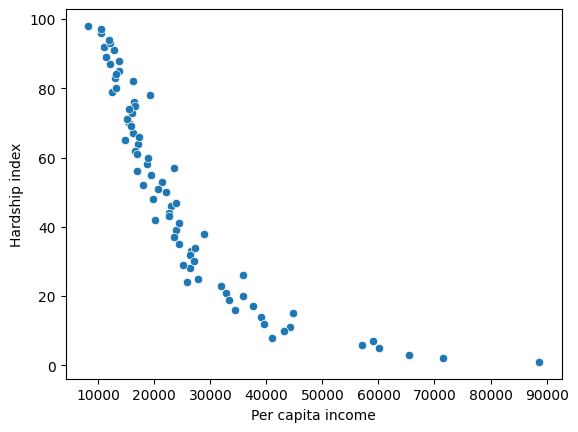

In [41]:
# Now I want to see the correlation between per_capita_income_ and hardship_index. I'll do it with a scatter plot.
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data
plot = sns.scatterplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
plot.set_xlabel("Per capita income")
plot.set_ylabel("Hardship index")

In [18]:
# I see that as Per Capita Income rises the Hardship Index decreases.
# That means there's a negative correlation between the two variables.

 * sqlite:///socioeconomic.db
Done.


Text(0, 0.5, 'Percent aged 16 unemployed')

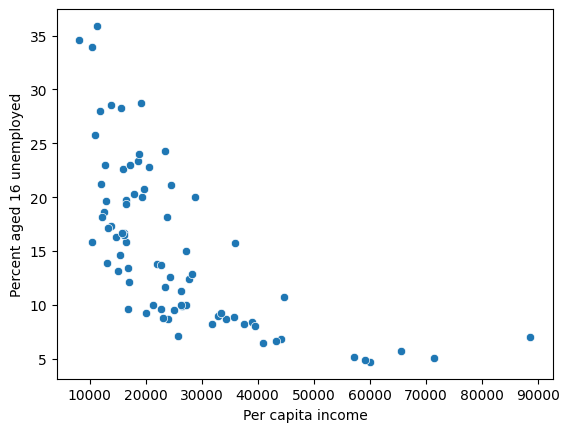

In [40]:
# Now I want to see the correlation between per_capita_income_ and percent_aged_16_unemployed. I'll do it with another scatter plot.
income_vs_unemployed = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data
plot = sns.scatterplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_unemployed.DataFrame())
plot.set_xlabel("Per capita income")
plot.set_ylabel("Percent aged 16 unemployed")

In [20]:
# Again, as Per Capita Income rises the Percentage of Aged 16+ Unemployed decreases, so again the correlation is negative but less defined, more spread.